# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

**IMPORT statements**

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import string

**Scrap data from website**

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
#create a dataframe of reviews
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | The check in area for premium classes at Gatwick is very nice, and there was no queue when I arrived so I was able to drop my bag very quickly. Premium security at Gatwick is fine. The flight was delayed due to NATS issues, but the member of staff on arriving at the lounge let me know of this. The lounge is nicevand it’ very comfortable. There was an excellent range of food and drinks. All the drinks you would expect. Food wise there were sandwiches, soup, pasta, salads, fruit, Spanish stew, as well as turkey and ham pies with mashed potato, roasted parsnips and carrots and gravy. It was all really good and particularly nice to see so many options. Boarding was pretty slow, although the gate crew did a good job to keep it well organised and allow priority passengers to board first. As has been well documented the onboard experience in terms of seat on ba Europe business is pretty poor, but in line with other European carriers sadly. That being said, the seat is well padded and comfortable and the adjustable headrest is quite good. The on board catering was of excellent quality. I was lucky to get my preferred option of the roast turkey, but several people sat near me weren’t as lucky. I do understand that meal options may run out but when the meal options are roast turkey with all the trimmings, vegetarian cottage pie or a chicken salad you really should be stocking enough for every passenger to get the proper meal Or failing that, allow an order in advance service where you then only stock the meals that people want to eat. Whilst I fully support the desire to minimise waste, both food and cost, people really should really be able to get the ideal meal option. Unfortunately one of the people affected reacted very badly to this and took it out on the cabin crew which is unacceptable.. they also lost a bit of perspective about just how serious a situation it actually was! The cabin crew were very nice, friendly and professional, if a little slow.. but not to the point of detracting from the positive experience I had. The ground service at Gran Canaria was pretty poor, priority bags clearly meant nothing. 95% of bags coming out were not priority, mine came out about halfway through bag delivery and demonstrates poor delivery of service and not fulfilling on the service they promise to their customers. Overall though it was a very nice flight, and having paid for it using avios and £1 I cannot complain at all."
1,✅ Trip Verified | The flight took off a little late due to Heathrow congestion but still landed on schedule. Boarding was smooth and the onboard service was efficient. A small snack was served for free with a bottle of water; additional items were available for purchase. The cabin and toilets were very clean. Overall an unremarkable flight but in a good way!
2,"✅ Trip Verified | BA is great in the air! But... they sell you connections thru London Heathrow Terminal 5 (their private, BA-only terminal) which you are practically not able to make. 90 minutes stopover time, European flight inbound, transatlantic flight outbound, you arrive at the terminal gate ON TIME and... book, security! Endless line, slow process. Your boarding starts and you are nowhere near the X ray, and then.... it is a train ride withing the same terminal (but different, distant buildings). Almost impossible to make. Lots of stress."
3,"✅ Trip Verified | I had broken my leg 2 days before our return flight from Lisbon to London. I called to get some assistance from British Airways, hoping for wheelchair assistance, an easier seat to get to, or possibly an upgrade so that I could stretch out my broken leg, which was in a cast. This airline failed on all fronts. Quoted us a price of €6,000 each (I was traveling with my husband), which we could not do. Almost didn't let me on the plane, trying to interpret my medical report. They did not attempt to change our seats, which were near the back. The single concession they made wa

In [5]:
#df.to_csv("Airways/reviews.csv")

The loops above collected 1000 reviews by iterating through the paginated pages on the website.

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Lemmatization is process to convert the word into its root word to identify similarities.

In [6]:
# Lemmatization function
def lemmatize_text(text):
    #convert whole review into lower case and split sentence into words
    words = word_tokenize(text.lower())
    
    #filter out alphabetic words from the text review
    words = [word for word in words if word.isalnum()]
    
    #get all the stop words
    stop_words = set(stopwords.words('english'))
    
    #filter out all the stop words from the reviews
    filtered_words = [word for word in words if word not in stop_words]
    
    #Lemmatization is process to  convert the word into its root word to identify similarities
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    return ' '.join(lemmatized_words)

In [7]:
# Remove part before first "| " if exists
df['reviews'] = df['reviews'].str.replace(r'^.*?\|\s*', '', regex=True)

# Apply edit to the 'reviews' column
df['reviews'] = df['reviews'].apply(lemmatize_text)
df.head()

,reviews
0,check area premium class gatwick nice queue arrived able drop bag quickly premium security gatwick fine flight delayed due nats issue member staff arriving lounge let know lounge nicevand comfortable excellent range food drink drink would expect food wise sandwich soup pasta salad fruit spanish stew well turkey ham pie mashed potato roasted parsnip carrot gravy really good particularly nice see many option boarding pretty slow although gate crew good job keep well organised allow priority passenger board first well documented onboard experience term seat ba europe business pretty poor line european carrier sadly said seat well padded comfortable adjustable headrest quite good board catering excellent quality lucky get preferred option roast turkey several people sat near lucky understand meal option may run meal option roast turkey trimming vegetarian cottage pie chicken salad really stocking enough every passenger get proper meal failing allow order advance service stock meal people want eat whilst fully support desire minimise waste food cost people really really able get ideal meal option unfortunately one people affected reacted badly took cabin crew unacceptable also lost bit perspective serious situation actually cabin crew nice friendly professional little slow point detracting positive experience ground service gran canaria pretty poor priority bag clearly meant nothing 95 bag coming priority mine came halfway bag delivery demonstrates poor delivery service fulfilling service promise customer overall though nice flight paid using avios complain
1,flight took little late due heathrow congestion still landed schedule boarding smooth onboard service efficient small snack served free bottle water additional item available purchase cabin toilet clean overall unremarkable flight good way
2,ba great air sell connection thru london heathrow terminal 5 private terminal practically able make 90 minute stopover time european flight inbound transatlantic flight outbound arrive terminal gate time book security endless line slow process boarding start nowhere near x ray train ride withing terminal different distant building almost impossible make lot stress
3,broken leg 2 day return flight lisbon london called get assistance british airway hoping wheelchair assistance easier seat get possibly upgrade could stretch broken leg cast airline failed front quoted u price traveling husband could almost let plane trying interpret medical report attempt change seat near back single concession made allow board 1st offer wheelchair swing aisle seat using arm rest 21 row seat aisle wide enough crutch might add nearly exit way wheelchair waiting heathrow hop onto bus crutch change terminal nearly took tumble took long get wheelchair hold connecting flight another airline last board flight allowed u upgrade business class reasonable price took great care
4,check mia straightforward ba use american flagship lounge near gate d30 excellent flight delayed 1 hour boarding chaotic board staff fine seat fine product ageing post take service prompt slept 6 hour noticed club world ba ditched rose champagne shame pre arrival breakfast slow deplane luggage ok


In [8]:
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)

    # The compound score ranges from -1 (most negative) to 1 (most positive)
    compound_score = sentiment_scores['compound']

    if compound_score > 0.05:
        return "positive"
    elif compound_score < -0.05:
        return "negative"
    else:
        return "neutral"

In [9]:
#an instance of the SentimentIntensityAnalyzer class
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['reviews'].apply(analyze_sentiment)
df.head()

,reviews,sentiment
0,check area premium class gatwick nice queue arrived able drop bag quickly premium security gatwick fine flight delayed due nats issue member staff arriving lounge let know lounge nicevand comfortable excellent range food drink drink would expect food wise sandwich soup pasta salad fruit spanish stew well turkey ham pie mashed potato roasted parsnip carrot gravy really good particularly nice see many option boarding pretty slow although gate crew good job keep well organised allow priority passenger board first well documented onboard experience term seat ba europe business pretty poor line european carrier sadly said seat well padded comfortable adjustable headrest quite good board catering excellent quality lucky get preferred option roast turkey several people sat near lucky understand meal option may run meal option roast turkey trimming vegetarian cottage pie chicken salad really stocking enough every passenger get proper meal failing allow order advance service stock meal people want eat whilst fully support desire minimise waste food cost people really really able get ideal meal option unfortunately one people affected reacted badly took cabin crew unacceptable also lost bit perspective serious situation actually cabin crew nice friendly professional little slow point detracting positive experience ground service gran canaria pretty poor priority bag clearly meant nothing 95 bag coming priority mine came halfway bag delivery demonstrates poor delivery service fulfilling service promise customer overall though nice flight paid using avios complain,positive
1,flight took little late due heathrow congestion still landed schedule boarding smooth onboard service efficient small snack served free bottle water additional item available purchase cabin toilet clean overall unremarkable flight good way,positive
2,ba great air sell connection thru london heathrow terminal 5 private terminal practically able make 90 minute stopover time european flight inbound transatlantic flight outbound arrive terminal gate time book security endless line slow process boarding start nowhere near x ray train ride withing terminal different distant building almost impossible make lot stress,positive
3,broken leg 2 day return flight lisbon london called get assistance british airway hoping wheelchair assistance easier seat get possibly upgrade could stretch broken leg cast airline failed front quoted u price traveling husband could almost let plane trying interpret medical report attempt change seat near back single concession made allow board 1st offer wheelchair swing aisle seat using arm rest 21 row seat aisle wide enough crutch might add nearly exit way wheelchair waiting heathrow hop onto bus crutch change terminal nearly took tumble took long get wheelchair hold connecting flight another airline last board flight allowed u upgrade business class reasonable price took great care,positive
4,check mia straightforward ba use american flagship lounge near gate d30 excellent flight delayed 1 hour boarding chaotic board staff fine seat fine product ageing post take service prompt slept 6 hour noticed club world ba ditched rose champagne shame pre arrival breakfast slow deplane luggage ok,positive


In [10]:
data = df['sentiment'].value_counts()
data

positive    573
negative    406
neutral      21
Name: sentiment, dtype: int64

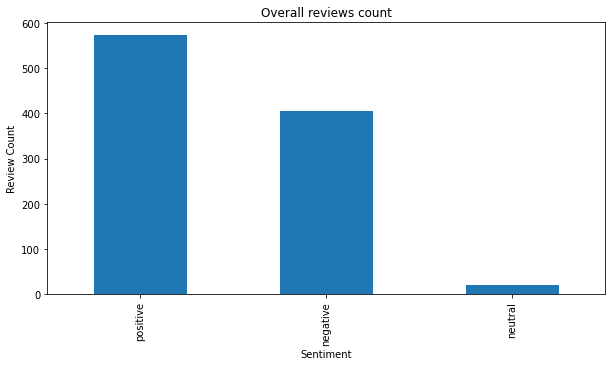

In [11]:
plt.figure(figsize=(10,5))
data.plot(kind='bar')
plt.title('Overall reviews count')
plt.xlabel('Sentiment')
plt.ylabel('Review Count')
plt.show()

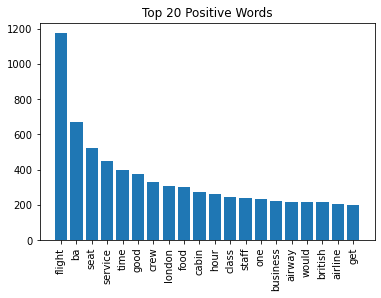

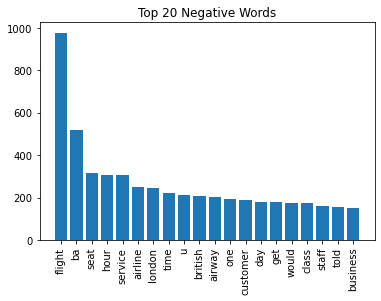

In [12]:
#Word frequency

from collections import Counter

positive_words = []
negative_words = []

# Step 4: Word and Phrase Frequency Count
for index, row in df.iterrows():
    words = row['reviews'].split()
    if row['sentiment'] == 'positive':
        positive_words.extend(words)
    else:
        negative_words.extend(words)

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Step 5: Data Visualization (Bar Graphs)
def create_bar_graph(data, title):
    plt.bar(data.keys(), data.values())
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

create_bar_graph(dict(positive_word_counts.most_common(20)), "Top 20 Positive Words")
create_bar_graph(dict(negative_word_counts.most_common(20)), "Top 20 Negative Words")


**Model instantiation**

In [13]:
from transformers import pipeline

task = "zero-shot-classification"
model = "facebook/bart-large-mnli"
classifier = pipeline(task, model)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBartForSequenceClassification: ['model.decoder.version', 'model.encoder.version']
- This IS expected if you are initializing TFBartForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBartForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBartForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForSequenceClassification for predictions without further training.


**Model execution**
- Run model and generate appropriate labels to each the review

In [14]:
%%time
labels = ['time', 'entertainment', 'food', 'staff', 'service', 'seat']

predicted_labels = []

for review in df['reviews']:
    predicted_labels.append(classifier(review, labels)['labels'][0])
  


CPU times: user 4h 10min 42s, sys: 23min 15s, total: 4h 33min 58s
Wall time: 1h 20min


In [15]:
df['predicted_labels'] = pd.DataFrame(predicted_labels)
df.head()

,reviews,sentiment,predicted_labels
0,check area premium class gatwick nice queue arrived able drop bag quickly premium security gatwick fine flight delayed due nats issue member staff arriving lounge let know lounge nicevand comfortable excellent range food drink drink would expect food wise sandwich soup pasta salad fruit spanish stew well turkey ham pie mashed potato roasted parsnip carrot gravy really good particularly nice see many option boarding pretty slow although gate crew good job keep well organised allow priority passenger board first well documented onboard experience term seat ba europe business pretty poor line european carrier sadly said seat well padded comfortable adjustable headrest quite good board catering excellent quality lucky get preferred option roast turkey several people sat near lucky understand meal option may run meal option roast turkey trimming vegetarian cottage pie chicken salad really stocking enough every passenger get proper meal failing allow order advance service stock meal people want eat whilst fully support desire minimise waste food cost people really really able get ideal meal option unfortunately one people affected reacted badly took cabin crew unacceptable also lost bit perspective serious situation actually cabin crew nice friendly professional little slow point detracting positive experience ground service gran canaria pretty poor priority bag clearly meant nothing 95 bag coming priority mine came halfway bag delivery demonstrates poor delivery service fulfilling service promise customer overall though nice flight paid using avios complain,positive,food
1,flight took little late due heathrow congestion still landed schedule boarding smooth onboard service efficient small snack served free bottle water additional item available purchase cabin toilet clean overall unremarkable flight good way,positive,service
2,ba great air sell connection thru london heathrow terminal 5 private terminal practically able make 90 minute stopover time european flight inbound transatlantic flight outbound arrive terminal gate time book security endless line slow process boarding start nowhere near x ray train ride withing terminal different distant building almost impossible make lot stress,positive,time
3,broken leg 2 day return flight lisbon london called get assistance british airway hoping wheelchair assistance easier seat get possibly upgrade could stretch broken leg cast airline failed front quoted u price traveling husband could almost let plane trying interpret medical report attempt change seat near back single concession made allow board 1st offer wheelchair swing aisle seat using arm rest 21 row seat aisle wide enough crutch might add nearly exit way wheelchair waiting heathrow hop onto bus crutch change terminal nearly took tumble took long get wheelchair hold connecting flight another airline last board flight allowed u upgrade business class reasonable price took great care,positive,seat
4,check mia straightforward ba use american flagship lounge near gate d30 excellent flight delayed 1 hour boarding chaotic board staff fine seat fine product ageing post take service prompt slept 6 hour noticed club world ba ditched rose champagne shame pre arrival breakfast slow deplane luggage ok,positive,service


In [16]:
df['predicted_labels'].value_counts()

service          460
time             188
seat             145
staff             92
food              78
entertainment     37
Name: predicted_labels, dtype: int64

In [17]:
df.to_csv('british_airways_data.csv', index=False)

In [18]:
data = pd.read_csv('british_airways_data.csv')
data.head()

,reviews,sentiment,predicted_labels
0,check area premium class gatwick nice queue arrived able drop bag quickly premium security gatwick fine flight delayed due nats issue member staff arriving lounge let know lounge nicevand comfortable excellent range food drink drink would expect food wise sandwich soup pasta salad fruit spanish stew well turkey ham pie mashed potato roasted parsnip carrot gravy really good particularly nice see many option boarding pretty slow although gate crew good job keep well organised allow priority passenger board first well documented onboard experience term seat ba europe business pretty poor line european carrier sadly said seat well padded comfortable adjustable headrest quite good board catering excellent quality lucky get preferred option roast turkey several people sat near lucky understand meal option may run meal option roast turkey trimming vegetarian cottage pie chicken salad really stocking enough every passenger get proper meal failing allow order advance service stock meal people want eat whilst fully support desire minimise waste food cost people really really able get ideal meal option unfortunately one people affected reacted badly took cabin crew unacceptable also lost bit perspective serious situation actually cabin crew nice friendly professional little slow point detracting positive experience ground service gran canaria pretty poor priority bag clearly meant nothing 95 bag coming priority mine came halfway bag delivery demonstrates poor delivery service fulfilling service promise customer overall though nice flight paid using avios complain,positive,food
1,flight took little late due heathrow congestion still landed schedule boarding smooth onboard service efficient small snack served free bottle water additional item available purchase cabin toilet clean overall unremarkable flight good way,positive,service
2,ba great air sell connection thru london heathrow terminal 5 private terminal practically able make 90 minute stopover time european flight inbound transatlantic flight outbound arrive terminal gate time book security endless line slow process boarding start nowhere near x ray train ride withing terminal different distant building almost impossible make lot stress,positive,time
3,broken leg 2 day return flight lisbon london called get assistance british airway hoping wheelchair assistance easier seat get possibly upgrade could stretch broken leg cast airline failed front quoted u price traveling husband could almost let plane trying interpret medical report attempt change seat near back single concession made allow board 1st offer wheelchair swing aisle seat using arm rest 21 row seat aisle wide enough crutch might add nearly exit way wheelchair waiting heathrow hop onto bus crutch change terminal nearly took tumble took long get wheelchair hold connecting flight another airline last board flight allowed u upgrade business class reasonable price took great care,positive,seat
4,check mia straightforward ba use american flagship lounge near gate d30 excellent flight delayed 1 hour boarding chaotic board staff fine seat fine product ageing post take service prompt slept 6 hour noticed club world ba ditched rose champagne shame pre arrival breakfast slow deplane luggage ok,positive,service


In [23]:
#function to plot donut chart
def plot_data(data, title_name):
    data = data.groupby('sentiment')[['predicted_labels']].count().reset_index()
    fig = px.pie(values=data['predicted_labels'], names=data['sentiment'], hole=0.6, title= title_name)
    
    # Display the chart
    fig.show()

In [32]:
'''
#plot the percentage sentiments of each label

for label in labels:
    data = df[df['predicted_labels']== label]
    plot_data(data,label)
'''

"\n#plot the percentage sentiments of each label\n\nfor label in labels:\n    data = df[df['predicted_labels']== label]\n    plot_data(data,label)\n"

In [26]:
data = df[df['predicted_labels']== labels[0]]
plot_data(data,labels[0])

Majority of customers (i.e. 55.9% of total) give negative review about time puncuality of the flight. This is a concerning issue and airline must be taken this into consideration in order to increase its customer reach and business.

In [27]:
data = df[df['predicted_labels']== labels[1]]
plot_data(data,labels[1])

Mostly customers give positive review about entertainment. This shows the customers are satisfied with this service.

In [28]:
data = df[df['predicted_labels']== labels[2]]
plot_data(data,labels[2])

Around 58% customers are satisfied with the infight food service. Althrough majority of customers are satisfied but still airline have scope to improve in this service in order to excel its services

In [29]:
data = df[df['predicted_labels']== labels[3]]
plot_data(data,labels[3])

60% customers are happy with the staff of the airline.

In [30]:
data = df[df['predicted_labels']== labels[4]]
plot_data(data,labels[4])

In [31]:
data = df[df['predicted_labels']== labels[5]]
plot_data(data,labels[5])

Seat comfort is an important factor although 52% customers are satisifed but almost equally are not satisifed as well. This will lead to customer to choose another airline in their next trip. To increase the customer retention rate as well as more buyer airline must consider the seat comfort at priority.

## Conclusion:
Time puncuality and seat comfort are the two major factor that leads to unsatified customers. Imporevement in these two section may lead to an excellent customer experience with the airline. 